# 4. PCA and t-SNE
In this lab, we will go through PCA and t-SNE on MNIST dataset. 

## MNIST dataset
The `mnist` package provides a function to load the MNIST dataset. The MNIST dataset is a dataset of handwritten digits. It has 60,000 training samples, and 10,000 test samples. Each image is represented by 28x28 pixels, each containing a value 0 - 255 with its grayscale value. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. See [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

In [10]:
# load from mnist dataset: python-mnist
# train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)


from mnist import MNIST
# Initialize the dataset
mndata = MNIST('../../datasets') # change the path to the dataset folder
# Load the dataset into memory (this will search the four files above)
mndata.gz = True

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

You can also import the MNIST dataset from `keras` package. 
`keras` is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
It was developed with a focus on enabling fast experimentation. 
Being able to go from idea to result with the least possible delay is key to doing good research.
``` python
from keras.datasets import mnist
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

Also, you can call the MNIST dataset from `pytorch` package.
PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR). It is free and open-source software released under the Modified BSD license. 
``` python
import torch
import torchvision
import torchvision.transforms as transforms
# Load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
```

## Tasks
1. Load the MNIST dataset.
2. Apply PCA and t-SNE on the MNIST dataset. Try the test dataset. t-SNE is time-consuming, so you can use a subset of the dataset.
3. Visualize the results of PCA and t-SNE.
4. Compare the results of PCA and t-SNE.
5. Discuss the pros and cons of PCA and t-SNE.

## PCA
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variations. <br>
NOTE: the following is a template code. You need to change or modify the variable `X_train`.

In [11]:
from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2, svd_solver='randomized')
# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(X_train)

Have a look at the PCA results. Save the plot using `plt.savefig()` to a folder `labs/lab4` and name it `MNIST_PCA.png`.

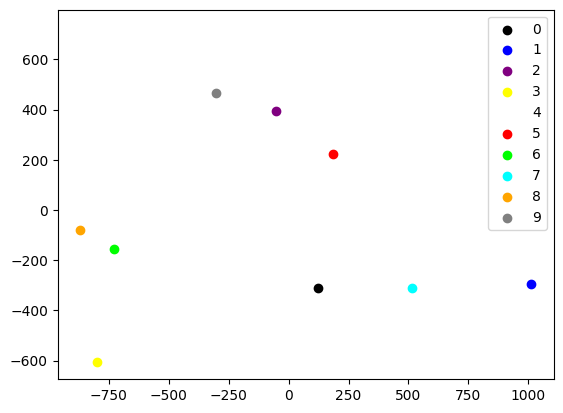

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
# Plot the data
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][i]
    y = reduced_data_rpca[:, 1][i]
    plt.scatter(x, y, c=colors[i])
plt.legend(list(map(str, range(10))))
plt.show()
plt.savefig('MNIST_PCA.png')

## t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation

In [12]:
import numpy as np
from mnist import MNIST
from sklearn.manifold import TSNE

# Initialize the dataset
mndata = MNIST('../../datasets')  # change the path to the dataset folder
mndata.gz = True

# Load the dataset into memory
X_train, y_train = mndata.load_training()

# Subsetting the data
subset_size = 1000  # Define the size of the subset
X_train_subset = X_train[:subset_size]  # Select the first subset_size samples
y_train_subset = y_train[:subset_size]  # Select the corresponding labels

# Convert to numpy array
X_train_array = np.array(X_train_subset)

# Create a t-SNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_train_array)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.167s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 739.435064
[t-SNE] KL divergence after 200 iterations with early exaggeration: 66.360023
[t-SNE] KL divergence after 300 iterations: 1.003286


Have a look at the t-SNE results. Save the plot using `plt.savefig()` to a folder `labs/lab4` and name it `MNIST_tSNE.png`.

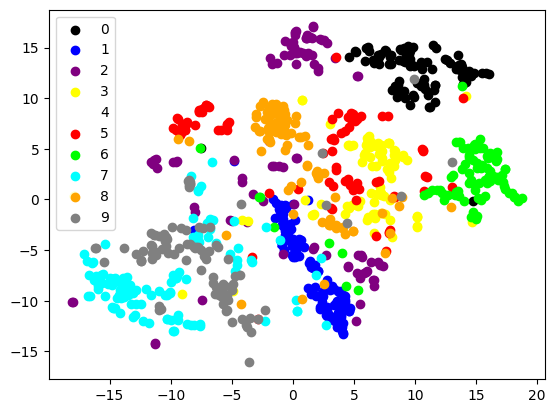

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
# Convert to numpy array
y_train_array = np.array(y_train_subset)
# Plot the data using subsetted labels
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = tsne_results[:, 0][y_train_array == i]
    y = tsne_results[:, 1][y_train_array == i]
    plt.scatter(x, y, c=colors[i], label=str(i))  # Using the subsetted labels
plt.legend()
plt.show()
plt.savefig('MNIST_tSNE.png')